In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.cross_validation import KFold 
import sklearn
from sklearn import metrics
import sklearn.tree
from sklearn import tree 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
import pydot

Couldn't import dot_parser, loading of dot files will not be possible.


/home/fsftn/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
loan = pd.read_csv('train.csv')

In [3]:
np.unique(loan['Married'])
loan['Married'].fillna('Yes', inplace = True)#as most were married
np.unique(loan['Married'])
loan.dtypes

/home/fsftn/anaconda2/lib/python2.7/site-packages/numpy/lib/arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [4]:
np.unique(loan['Dependents'])

array([nan, '0', '1', '2', '3+'], dtype=object)

In [5]:
for index, row in loan.iterrows():
    if(loan['Dependents'][index] == '3+'):
        loan['Dependents'][index] = '3'
    
loan['Dependents'].fillna('4', inplace = True)
print(np.unique(loan['Dependents']))
print(loan['Dependents'].value_counts())

/home/fsftn/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


['0' '1' '2' '3' '4']
0    345
1    102
2    101
3     51
4     15
Name: Dependents, dtype: int64


In [6]:
#for filling na values of noOfDependents based on marital status
for index, row in loan.iterrows():
    if(loan['Dependents'][index] == '4' and loan['Married'][index] == 'Yes'):
        loan['Dependents'][index] = '2'
    if(loan['Dependents'][index] == '4' and loan['Married'][index] == 'No'):
        loan['Dependents'][index] = '0'

/home/fsftn/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/fsftn/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
#print(np.unique(loan['Dependents']))
print(loan['Loan_Status'].value_counts())

Y    422
N    192
Name: Loan_Status, dtype: int64


In [8]:
loan['LoanAmount'].fillna(loan['LoanAmount'].mean(),inplace = True)
loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mean(),inplace = True)
loan['ApplicantIncome'].fillna(loan['ApplicantIncome'].mean(),inplace = True)
loan['CoapplicantIncome'].fillna(loan['CoapplicantIncome'].mean(),inplace = True)
loan['Self_Employed'].fillna(0,inplace = True)


In [9]:
#modifiying to make gender, married, education,selfEmployed and PropertyArea, LoanStatus as numeric values
loan.loc[loan["Education"]== "Graduate", "Education"] =1 
loan.loc[loan["Education"]== "Not Graduate", "Education"] = 0
loan.loc[loan["Gender"]== "Male", "Gender"] =1 
loan.loc[loan["Gender"]== "Female", "Gender"] = 0
loan.loc[loan["Married"]== "Yes", "Married"] =1 
loan.loc[loan["Married"]== "No", "Married"] = 0
loan.loc[loan["Self_Employed"]== "Yes", "Self_Employed"] =1 
loan.loc[loan["Self_Employed"]== "No", "Self_Employed"] = 0

loan.loc[loan["Property_Area"]== "Urban", "Property_Area"] =2 
loan.loc[loan["Property_Area"]== "Rural", "Property_Area"] = 0
loan.loc[loan["Property_Area"]== "Semiurban", "Property_Area"] = 1

loan.loc[loan["Loan_Status"]== "Y", "Loan_Status"] =1 
loan.loc[loan["Loan_Status"]== "N", "Loan_Status"] = 0

In [10]:
loan[:5]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0,146.412162,360,1,2,1
1,LP001003,1,1,1,1,0,4583,1508,128.000000,360,1,0,0
2,LP001005,1,1,0,1,1,3000,0,66.000000,360,1,2,1
3,LP001006,1,1,0,0,0,2583,2358,120.000000,360,1,2,1
4,LP001008,1,0,0,1,0,6000,0,141.000000,360,1,2,1


In [11]:
cntMenP =0
cntMenN =0 
cntWMenP = 0
cntWMenN = 0
for index, row in loan.iterrows():
    if(loan['Gender'][index] == 1 and loan['Loan_Status'][index] == 1):
        cntMenP = cntMenP+1;
    if(loan['Gender'][index] == 1 and loan['Loan_Status'][index] == 0):
        cntMenN = cntMenN+1;
    if(loan['Gender'][index] ==  0 and loan['Loan_Status'][index] == 1):
        cntWMenP = cntWMenP+1;
    if(loan['Gender'][index] == 0 and loan['Loan_Status'][index] == 0):
        cntWMenN = cntWMenN+1;
MenPcent = 100*cntMenP/(cntMenP+cntMenN)
WMenPcent = 100*cntWMenP/(cntWMenP+cntWMenN)
print(MenPcent)
print(WMenPcent)

69
66


In [12]:
loan['Loan_Status'] = pd.to_numeric(loan['Loan_Status'])
loan['Gender'] = pd.to_numeric(loan['Gender'])
loan['Married'] = pd.to_numeric(loan['Married'])
loan['Dependents'] = pd.to_numeric(loan['Dependents'])
loan['Education'] = pd.to_numeric(loan['Education'])
loan['Self_Employed'] = pd.to_numeric(loan['Self_Employed'])
loan['Credit_History'] = pd.to_numeric(loan['Credit_History'])
loan['Property_Area'] = pd.to_numeric(loan['Property_Area'])
print(loan.dtypes)

Loan_ID               object
Gender               float64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object


In [13]:
def classification_model(model, data, predictors, outcome):
    #Fit the model:
    mod = model.fit(data[predictors],data[outcome])
  
    #Make predictions on training set:
    predictions = model.predict(data[predictors])
    print(predictions.size)
    print(data[predictors].size)
    
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print "Accuracy : %s" % "{0:.3%}".format(accuracy)
    
    
    #Perform k-fold cross-validation with 5 folds
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    for train, test in kf:
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])
    
        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]
    
        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
    
        #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
    #print predictions
   
    print "Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error))

    #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome]) 
    

In [14]:
outcome_var = 'Loan_Status'
predictor_var = ['Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Credit_History','Property_Area']

In [15]:
#predictor_var = ['CoapplicantIncome','Education']
predictor_var = ['Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Credit_History','Property_Area']
predictor_var = ['Married','Dependents','Education','Self_Employed']
predictor_var = ['Married','Dependents','Self_Employed','Property_Area']
predictor_var = ['Married','Dependents','Self_Employed','Education']

In [16]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['CoapplicantIncome', 'ApplicantIncome','Married','LoanAmount','Loan_Amount_Term']
predictor_var = ['Married','Loan_Amount_Term']

classification_model(model, loan,predictor_var,outcome_var)
#titanic['Survived'].shape

614
1228
Accuracy : 68.730%
Cross-Validation Score : 68.729%


In [17]:
outcome_var = 'Loan_Status'
clf = LogisticRegression()
predictor_var = ['Married','Loan_Amount_Term']
clf.fit(loan[predictor_var],loan[outcome_var])
#clf.coef_
#titanic['Survived'].shape

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
print(loan['Credit_History'].value_counts())
loan['Credit_History'].fillna(0.0, inplace = True)#as most were married
np.unique(loan['Credit_History'])

1    475
0     89
Name: Credit_History, dtype: int64


array([ 0.,  1.])

In [19]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History','LoanAmount']
#predictor_var = ['Married','Loan_Amount_Term']
classification_model(model, loan,predictor_var,outcome_var)


614
1228
Accuracy : 77.036%
Cross-Validation Score : 77.041%


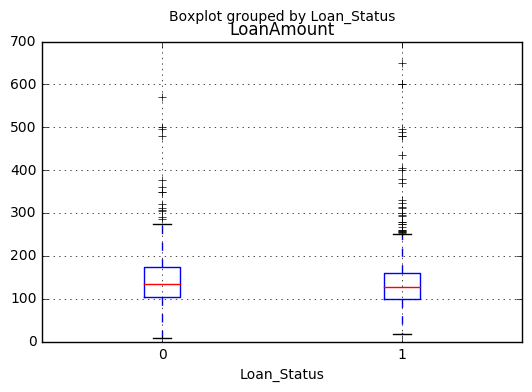

In [20]:
loan.boxplot(column='LoanAmount', by = 'Loan_Status') #boxplot for continious variable against some categorical var

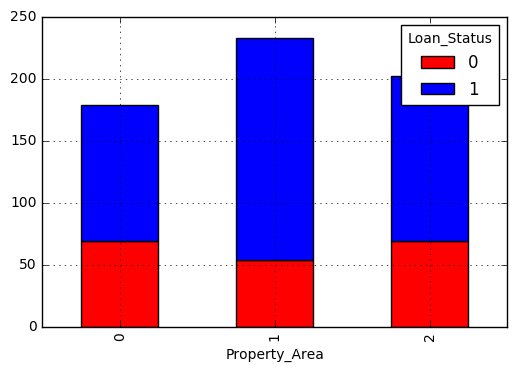

In [21]:
temp3 = pd.crosstab(loan['Property_Area'], loan['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=True)


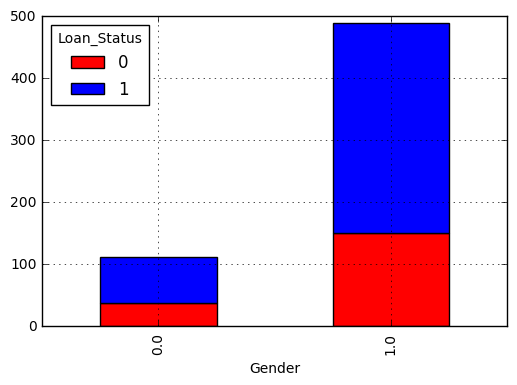

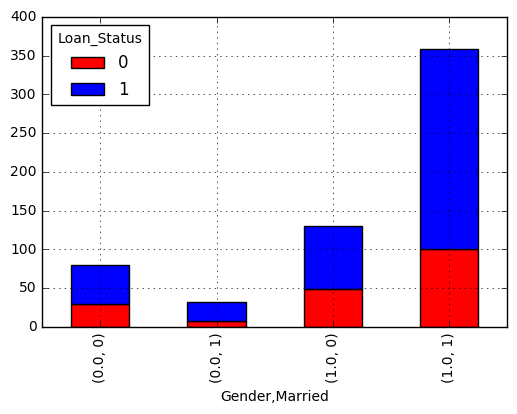

In [22]:
temp3 = pd.crosstab(loan['Gender'], loan['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=True)


temp4 = pd.crosstab([loan['Gender'], loan['Married']],loan['Loan_Status'], rownames=['Gender', 'Married'], colnames=['Loan_Status'])
temp4.plot(kind='bar', stacked=True, color=['red','blue'], grid=True)


In [23]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History','LoanAmount']
#predictor_var = ['Married','Loan_Amount_Term']
classification_model(model, loan,predictor_var,outcome_var)


614
1228
Accuracy : 77.036%
Cross-Validation Score : 77.041%


In [24]:
loan_test = pd.read_csv("test.csv")
for index, row in loan_test.iterrows():
    if(loan_test['Dependents'][index] == '3+'):
        loan_test['Dependents'][index] = '3'


        
        
loan_test['Married'].fillna('Yes', inplace = True)#as most were married
loan_test['LoanAmount'].fillna(loan_test['LoanAmount'].mean(),inplace = True)
loan_test['Loan_Amount_Term'].fillna(loan_test['Loan_Amount_Term'].mean(),inplace = True)
loan_test['ApplicantIncome'].fillna(loan_test['ApplicantIncome'].mean(),inplace = True)
loan_test['CoapplicantIncome'].fillna(loan_test['CoapplicantIncome'].mean(),inplace = True)
loan_test['Self_Employed'].fillna(0,inplace = True)
loan_test['Credit_History'].fillna(1,inplace = True)

           
        
        
#modifiying to make gender, married, education,selfEmployed and PropertyArea, LoanStatus as numeric values
loan_test.loc[loan_test["Education"]== "Graduate", "Education"] =1 
loan_test.loc[loan_test["Education"]== "Not Graduate", "Education"] = 0
loan_test.loc[loan_test["Gender"]== "Male", "Gender"] =1 
loan_test.loc[loan_test["Gender"]== "Female", "Gender"] = 0
loan_test.loc[loan_test["Married"]== "Yes", "Married"] =1 
loan_test.loc[loan_test["Married"]== "No", "Married"] = 0
loan_test.loc[loan_test["Self_Employed"]== "Yes", "Self_Employed"] =1 
loan_test.loc[loan_test["Self_Employed"]== "No", "Self_Employed"] = 0

loan_test.loc[loan_test["Property_Area"]== "Urban", "Property_Area"] =2 
loan_test.loc[loan_test["Property_Area"]== "Rural", "Property_Area"] = 0
loan_test.loc[loan_test["Property_Area"]== "Semiurban", "Property_Area"] = 1
loan_test['Gender'] = pd.to_numeric(loan_test['Gender'])
loan_test['Married'] = pd.to_numeric(loan_test['Married'])
loan_test['Dependents'] = pd.to_numeric(loan_test['Dependents'])
loan_test['Education'] = pd.to_numeric(loan_test['Education'])
loan_test['Self_Employed'] = pd.to_numeric(loan_test['Self_Employed'])
loan_test['Credit_History'] = pd.to_numeric(loan_test['Credit_History'])
loan_test['Property_Area'] = pd.to_numeric(loan_test['Property_Area'])

loan_test[:3]

/home/fsftn/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,1,0,5720,0,110,360,1,2
1,LP001022,1,1,1,1,0,3076,1500,126,360,1,2
2,LP001031,1,1,2,1,0,5000,1800,208,360,1,2


In [25]:
print(np.unique(loan_test['Credit_History']))
print(loan_test['Credit_History'].value_counts())
#loan_test.describe

[ 0.  1.]
1    308
0     59
Name: Credit_History, dtype: int64


In [26]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History','LoanAmount','Married']
#predictor_var = ['Married','Loan_Amount_Term']
classification_model(model, loan,predictor_var,outcome_var)


clf = LogisticRegression()
clf.fit(loan[predictor_var], loan[outcome_var])
predictions = clf.predict(loan_test[predictor_var])


predans = []
for idx, a in enumerate(predictions):
    if a == 1:
        predans.append('Y')
    else:
        predans.append('N')



submission = pd.DataFrame({
       "Loan_ID" : loan_test['Loan_ID'],
        "Loan_Status": predans
          })
#print submission
#print predictions
submission.to_csv("datahackBMark.csv", index=False)

614
1842
Accuracy : 77.036%
Cross-Validation Score : 77.041%


In [27]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History','LoanAmount']
#predictor_var = ['Married','Loan_Amount_Term']
classification_model(model, loan,predictor_var,outcome_var)


clf = LogisticRegression()
clf.fit(loan[predictor_var], loan[outcome_var])
predictionsM1 = clf.predict(loan[predictor_var])

614
1228
Accuracy : 77.036%
Cross-Validation Score : 77.041%


In [28]:
outcome_var = 'Loan_Status'
model = DecisionTreeClassifier(max_depth= 20, min_samples_split=50, min_samples_leaf=20)

predictor_var = ['Credit_History','LoanAmount','ApplicantIncome','CoapplicantIncome','LoanAmount','Married','Education','Loan_Amount_Term']
#predictor_var = ['Married','Loan_Amount_Term']
classification_model(model, loan,predictor_var,outcome_var)



clf = DecisionTreeClassifier(max_depth= 20, min_samples_split=50, min_samples_leaf=20)
clf.fit(loan[predictor_var], loan[outcome_var])
predictionsM2 = clf.predict(loan[predictor_var])

614
4912
Accuracy : 77.036%
Cross-Validation Score : 77.041%


In [29]:
outcome_var = 'Loan_Status'
from sklearn.ensemble import RandomForestClassifier
model  = RandomForestClassifier(n_estimators=100,max_depth=10, min_samples_split=20, min_samples_leaf=15)

predictor_var = ['Married','Property_Area','Loan_Amount_Term','Credit_History','LoanAmount','ApplicantIncome','CoapplicantIncome','LoanAmount','Property_Area']
#predictor_var = ['Married','Loan_Amount_Term']
predictor_var = ['Credit_History','LoanAmount','ApplicantIncome','CoapplicantIncome','LoanAmount','Married','Education','Loan_Amount_Term']

classification_model(model, loan,predictor_var,outcome_var)


clf = RandomForestClassifier(n_estimators=200,max_depth=10, min_samples_split=8, min_samples_leaf=15)
clf.fit(loan[predictor_var], loan[outcome_var])
predictionsM3 = clf.predict(loan[predictor_var])

614
4912
Accuracy : 77.687%
Cross-Validation Score : 75.081%


In [30]:
outcome_var = 'Loan_Status'

from sklearn.ensemble import   GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=30, min_samples_split= 40, min_samples_leaf= 20, max_depth= 4)
predictor_var = ['Credit_History','LoanAmount','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term']
predictor_var = ['Credit_History','Married','LoanAmount','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','Property_Area','Self_Employed']

#predictor_var = ['Married','Loan_Amount_Term']
classification_model(model, loan,predictor_var,outcome_var)


clf = GradientBoostingClassifier(n_estimators=30, min_samples_split= 120, min_samples_leaf= 20, max_depth= 3)
clf.fit(loan[predictor_var], loan[outcome_var])
predictionsM4 = clf.predict(loan[predictor_var])

614
4912
Accuracy : 80.130%
Cross-Validation Score : 76.062%


In [31]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History','LoanAmount','ApplicantIncome','CoapplicantIncome','LoanAmount']
#predictor_var = ['Married','Loan_Amount_Term']
classification_model(model, loan,predictor_var,outcome_var)

clf = LogisticRegression()
clf.fit(loan[predictor_var], loan[outcome_var])
predictionsM1 = clf.predict(loan[predictor_var])

614
3070
Accuracy : 77.036%
Cross-Validation Score : 76.877%


In [32]:
print(predictionsM1.size)
print(predictionsM2.size)
print(predictionsM3.size)
print(predictionsM4.size)
ensemblePredict = np.zeros(predictionsM4.size)

for x in range(0,(predictionsM1.size)):
        neg = 0  
        pos = 0 
        if(predictionsM1[x] == 0 ):
            neg = neg +1 
        else:
            pos = pos + 1
        if(predictionsM2[x] == 0 ):
            neg = neg +1 
        else:
            pos = pos + 1
        if(predictionsM3[x] == 0 ):
            neg = neg +1 
        else:
            pos = pos + 1
        if(predictionsM4[x] == 0 ):
            neg = neg +1 
        else:
            pos = pos + 1
            
        if(neg > pos):
            ensemblePredict[x] = 0 
        elif(pos > neg):
            ensemblePredict[x] = 1 
        else:
            ensemblePredict[x] = predictionsM1[x]
            

614
614
614
614


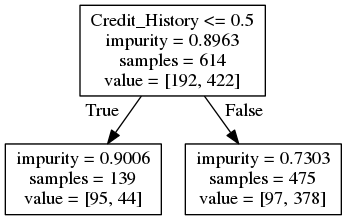

In [37]:
outcome_var = 'Loan_Status'
model = DecisionTreeClassifier(max_depth= 18, min_samples_split=350, min_samples_leaf=40)

predictor_var = ['Credit_History']

clf = DecisionTreeClassifier(criterion='entropy',max_depth=8, min_samples_split=4, min_samples_leaf=1 )
clf.fit(loan[predictor_var], loan[outcome_var])

dot_file = tree.export_graphviz(clf.tree_, out_file='tree_d1.dot', feature_names=predictor_var)  #export the tree to .dot file
from subprocess import check_call
check_call(['dot','-Tpng','tree_d1.dot','-o','OutputFiletttt.png'])
from IPython.core.display import Image, display
display(Image('OutputFile.png'))